# ID3 Decision Tree
## Introduction
ID3, or Itreative Dichotomizer 3, is a decision tree algorithm primarily used for classification tasks. ID3 relies on maximizing information gain as its guiding partition rule for nodes. The algorithm  relies on a measure of **Entropy** rather than Gini Impurity, though both are very simiar. We discuss the implications of these differences in this notebook. 

## Information gain using entropy
In simple terms, entropy is a measure of *randomness* in a set of data. The more uniformly distributed a set of data is with multiple different lables, the more 'random' the data is. That is, **entropy reaches a maximum when the probability of choosing any one label in the set tends towards 50% (equally likely to choose anything.)** Reducing entropy implies reducing this randomness, and thus increasing the proportion of one/few label(s) in a set as opposed to any others. 

Consequently, entropy (much like Gini impurity) is a measure of data **heterogenity** in a node (i.e how unmixed a set of data is.) ***Our goal is to produce partitions which minimize entropy.*** 

Entropy is defined as: 
### $ Entropy = - \sum_{n=0}^{C}~p_{i}~log~(~p_{i}~) $

where $p_{i}$ is the probability of choosing a label $i$ among $C$ classes. 

We can visualize this function the case of 2 classes, and plot how the entropy changes as a function of the probabilities of observing them: 






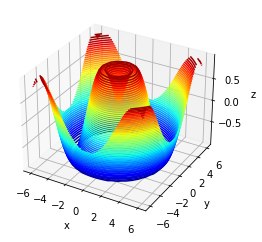

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    
    return -sum(x)

x = np.linspace(0.01, 0.99, 100)
x = np.linspace(0.01, 0.99, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');